In [2]:
from src.datasets.snli import *

In [3]:
options = {"device":'cuda','batch_size':128,"tokenizer":"bert","max_len":40}
data=snli(options)

In [4]:
for i in data.train_iter:
    print(i)
    break


[torchtext.data.batch.Batch of size 128 from SNLI]
	[.premise]:[torch.cuda.LongTensor of size 128x40 (GPU 0)]
	[.hypothesis]:[torch.cuda.LongTensor of size 128x40 (GPU 0)]
	[.label]:[torch.cuda.FloatTensor of size 128 (GPU 0)]


In [5]:
from src.model.snli_models import *

In [10]:
%load_ext autoreload
%autoreload 2

In [6]:
model_options = {
    "hidden_size":300,
    "embedding_dim":300,
    "dropout":0.3,
    "use_glove":False,
    "num_layers":1,
    "dataset":"snli",
    "fcs":1,
    "vocab_size":data.tokenizer.vocab_size,
    "tokenizer":"bert",
    "padding_idx":data.tokenizer.vocab['[PAD]'],
    "attention_layers_param":200
}

In [13]:
from sklearn.metrics import f1_score,precision_recall_fscore_support

In [12]:
f1_score([1,0,0,1,1,1],[1,1,1,1,1,1],labels=[0,1],pos_label=1)

0.8

In [30]:
precision_recall_fscore_support([1,0,0,1,1,1,0],[1,1,1,1,1,1,0])

(array([1.        , 0.66666667]),
 array([0.33333333, 1.        ]),
 array([0.5, 0.8]),
 array([3, 4]))

In [15]:
import torch


In [27]:
x,y = torch.empty((0,)),torch.empty((0,))
for i in range(10):
    a = torch.randint(0,2,(10,))
    b = torch.randint(0,2,(10,))
    x = torch.cat([a,x],dim = 0)
    y = torch.cat([b,y],dim = 0)

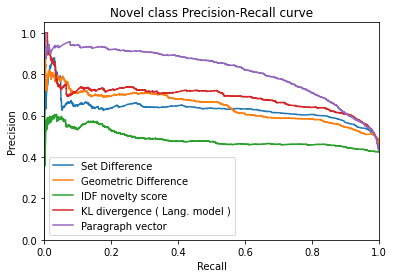

In [43]:
import pickle
from sklearn.metrics import precision_recall_curve
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os

_,probs_set_diff,probs_geo_diff,probs_tfidf_novelty_score,probs_kl_div,probs_pv,golds = pickle.load(open("dlnd_baselines_class_probs.p","rb"))

p_set_diff,r_set_diff,_ = precision_recall_curve(golds,[i[1] for i in probs_set_diff])
p_geo_diff,r_geo_diff,_ = precision_recall_curve(golds,[i[1] for i in probs_geo_diff])
p_tfidf_novelty_score,r_tfidf_novelty_score,_ = precision_recall_curve(golds,[i[1] for i in probs_tfidf_novelty_score])
p_kl_div,r_kl_div,_ = precision_recall_curve(golds,[i[1] for i in probs_kl_div])
p_pv,r_pv,_ = precision_recall_curve(golds,[i[1] for i in probs_pv])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Novel class Precision-Recall curve')
plt_set_diff = plt.plot(r_set_diff,p_set_diff,'-', label="Set Difference")
plt_geo_diff = plt.plot(r_geo_diff,p_geo_diff,'-', label="Geometric Difference")
plt_tfidf_novelty_score = plt.plot(r_tfidf_novelty_score,p_tfidf_novelty_score,'-', label="IDF novelty score")
plt_kl_div = plt.plot(r_kl_div,p_kl_div,'-', label="KL divergence ( Lang. model )")
plt_pv = plt.plot(r_pv,p_pv,'-', label="Paragraph vector")
#handles=[plt_set_diff,plt_geo_diff,plt_tfidf_novelty_score,plt_kl_div,plt_pv,plt_bilstm_mlp,plt_cnn]
plt.legend(loc='best')
plt.show()

In [46]:
invert_gold = [1-i for i in golds]

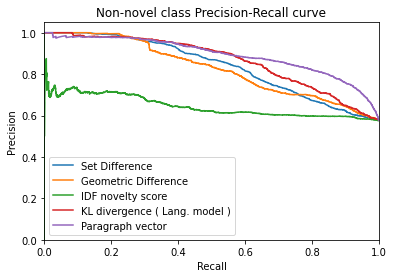

In [48]:
import pickle
from sklearn.metrics import precision_recall_curve
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os

_,probs_set_diff,probs_geo_diff,probs_tfidf_novelty_score,probs_kl_div,probs_pv,golds = pickle.load(open("dlnd_baselines_class_probs.p","rb"))

p_set_diff,r_set_diff,_ = precision_recall_curve(invert_gold,[i[0] for i in probs_set_diff])
p_geo_diff,r_geo_diff,_ = precision_recall_curve(invert_gold,[i[0] for i in probs_geo_diff])
p_tfidf_novelty_score,r_tfidf_novelty_score,_ = precision_recall_curve(invert_gold,[i[0] for i in probs_tfidf_novelty_score])
p_kl_div,r_kl_div,_ = precision_recall_curve(invert_gold,[i[0] for i in probs_kl_div])
p_pv,r_pv,_ = precision_recall_curve(invert_gold,[i[0] for i in probs_pv])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Non-novel class Precision-Recall curve')
plt_set_diff = plt.plot(r_set_diff,p_set_diff,'-', label="Set Difference")
plt_geo_diff = plt.plot(r_geo_diff,p_geo_diff,'-', label="Geometric Difference")
plt_tfidf_novelty_score = plt.plot(r_tfidf_novelty_score,p_tfidf_novelty_score,'-', label="IDF novelty score")
plt_kl_div = plt.plot(r_kl_div,p_kl_div,'-', label="KL divergence ( Lang. model )")
plt_pv = plt.plot(r_pv,p_pv,'-', label="Paragraph vector")
#handles=[plt_set_diff,plt_geo_diff,plt_tfidf_novelty_score,plt_kl_div,plt_pv,plt_bilstm_mlp,plt_cnn]
plt.legend(loc='best')
plt.show()

In [ ]:
def setup_prc_plit(title):
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title)


def plot_prc(plt,probs,gold,cls=0,label=""):
    p_,r_,_ = precision_recall_curve(gold,[i[0] for i in probs])
    plt.plot(r_,p_,"-",label)
